### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [1]:
# Write your code here 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats

In [2]:
a = np.random.normal(20,4,15)
b = np.random.normal(20,4,15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [3]:
# Doesn't look like a huge difference
np.mean(a), np.mean(b), np.mean(a) - np.mean(b)

(19.46153914017329, 20.87549497154517, -1.4139558313718794)

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

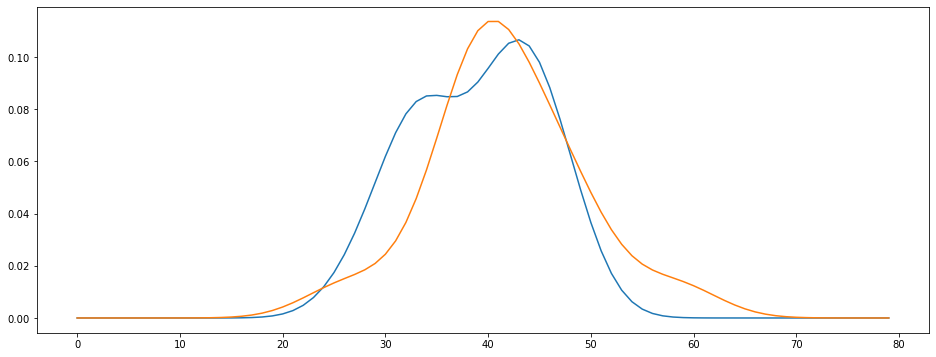

In [4]:
# Write your code here 
plt.figure(figsize=(16,6))
plt.plot(sp.stats.gaussian_kde(a).evaluate(np.arange(0,40,0.5)))
plt.plot(sp.stats.gaussian_kde(b).evaluate(np.arange(0,40,0.5)))

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

No. They have very similar overlap.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [5]:
all_data = np.concatenate([a,b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:20]
    b_subset = all_data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))

sum(means_difference >= (np.mean(a) - np.mean(b))) / len(means_difference) 

0.855

There is a statistically significant diference between 'a' and 'b'. The p-value is greater than 0.05.

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

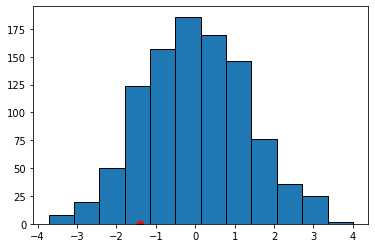

In [6]:
# Write your code here 
_ = plt.hist(means_difference, edgecolor='k', linewidth=1, bins=12)
plt.scatter(np.mean(a) - np.mean(b), 0, color = "red", s=40)